In [146]:
import pandas as pd
import numpy as np
import re
train = pd.read_csv('C:/Users/user/PycharmProjects/tensorflow/titanic/train.csv')
test = pd.read_csv('C:/Users/user/PycharmProjects/tensorflow/titanic/test.csv')

In [52]:
#trainCabin na제거
trainCabin.isnull()
trainCabin= trainCabin.dropna()
trainCabin


1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
849            C92
853         

In [57]:
train[['Cabin' , 'Survived']].dropna()

Cabin  Survived
1            C85         1
3           C123         1
6            E46         0
10            G6         1
11          C103         1
21           D56         1
23            A6         1
27   C23 C25 C27         0
31           B78         1
52           D33         1
54           B30         0
55           C52         1
61           B28         1
62           C83         0
66           F33         1
75         F G73         0
88   C23 C25 C27         1
92           E31         0
96            A5         0
97       D10 D12         1
102          D26         0
110         C110         0
118      B58 B60         0
123         E101         1
124          D26         0
128        F E69         1
136          D47         1
137         C123         0
139          B86         0
148           F2         0
..           ...       ...
751         E121         1
759          B77         1
763      B96 B98         1
765          D11         1
772          E77         0
776          F38         0
779           B3         1
781          B20         1
782           D6         0
789      B82 B84         0
796          D17         1
802      B96 B98         1
806          A36         0
809           E8         1
815         B102         0
820          B69         1
823         E121         1
829          B28         1
835          E49         1
839          C47         1
849          C92         1
853          D28         1
857          E17         1
862          D17         1
867          A24         0
871          D35         1
872  B51 B53 B55         0
879          C50         1
887          B42         1
889         C148         1

[204 rows x 2 columns]

In [147]:
train['Cabin'] = train['Cabin'].fillna("QQQ")
train['Cabin'].isnull().sum()

0

In [190]:
from string import digits
reString = []

for i in range(len(train['Cabin'])):
    string = train['Cabin'][i]
    remove_digits = str.maketrans('', '', digits)
    res = string.translate(remove_digits)
    reString.append(res[0])
    

reString

train['reCabin'] = reString
#reString

In [195]:
subtrain= train[['reCabin','Survived']].replace('Q' ,float('Nan')).dropna()

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def bar_chart(feature):
    survived = subtrain[subtrain['Survived']==1][feature].value_counts()
    dead = subtrain[subtrain['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived' , 'Dead']
    df.plot(kind='bar' , stacked=True , figsize=(10,5))

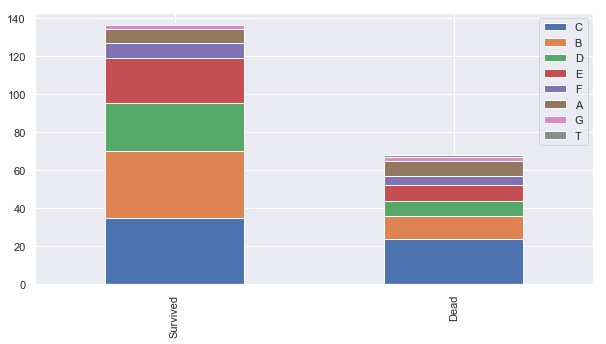

In [216]:
bar_chart('reCabin')